## Kickstarter Project (Machine Learning Project) - October 2023

<a id='about'/>

### About this file


Kickstarter is a popular crowdfunding platform that has helped thousands of entrepreneurs and creators bring their innovative ideas to life. However, not all Kickstarter projects are successful, and understanding the factors that contribute to success or failure can be valuable for both creators and investors alike.

In this dataset, we have collected information on a large number of Kickstarter projects and whether they ultimately succeeded or failed to meet their funding goals. This dataset includes a wide range of project types, including technology startups, creative arts endeavors, and social impact initiatives, among others.

By analyzing this dataset, researchers and analysts can gain insights into the characteristics of successful and unsuccessful Kickstarter projects, such as funding targets, project categories, and funding sources. This information can be used to inform investment decisions and guide future crowdfunding campaigns.

Overall, this dataset provides a comprehensive look at the Kickstarter ecosystem and can serve as a valuable resource for anyone interested in understanding the dynamics of crowdfunding and the factors that contribute to project success or failure.

### TOC (table of content)
0. [About this file](#about)
1. [Load packages & data](#loading)
3. [EDA technical](#technical)
4. [EDA information](#EDA_info)
5. [Feature engineering](#feature_engineering)
6. [Dummy Classifier](#dummy)
7. [Pipeline + ColumnTransformer](#pipeline)
8. [Evaluation](#evaluation)
9. [Additional Links](#links)
10. [Cross-validation](#crossval)
11. [GridSearchCV](#gridsearch)
12. [Set Kaggle solution](#kaggle)

<a id='loading'/>

### 1. Load packages & data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
import pandas as pd

In [2]:
df = pd.read_csv('data/kickstarter_projects.csv')

<a id='technical'/>

### 2. EDA - technical

In [10]:
df.shape

(374853, 11)

In [4]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [47]:
df.duplicated().sum()

0

In [9]:
df.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [12]:
df['State'].value_counts()

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [14]:
df.State.value_counts() / len(kickstarter) * 100

State
Failed        52.716932
Successful    35.707597
Canceled      10.337652
Live           0.746426
Suspended      0.491393
Name: count, dtype: float64

In [ ]:
df.Country.value_counts() / len(kickstarter) * 100

Country
United States     78.062067
United Kingdom     8.982454
Canada             3.936476
Australia          2.091220
Germany            1.112703
France             0.784041
Italy              0.767768
Netherlands        0.765100
Spain              0.607171
Sweden             0.468717
Mexico             0.467383
New Zealand        0.386018
Denmark            0.296916
Ireland            0.216351
Switzerland        0.202746
Norway             0.188874
Hong Kong          0.164865
Belgium            0.164598
Austria            0.159262
Singapore          0.148058
Luxembourg         0.016540
Japan              0.010671
Name: count, dtype: float64

### 3. Outlier Exploration

In [ ]:
df.query("State == 'Successful' and Goal > Pledged")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
258920,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Film & Video,Shorts,United States,2015-11-12 19:06:18,2015-12-27,36000,30716,275,Successful
272350,780863434,TUW Ruhla Watches - Comeback of a Legend,Design,Product Design,Germany,2016-02-08 19:14:02,2016-03-19,27885,27765,90,Successful


In [15]:
df.query("State == 'Failed' and Goal < Pledged")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
2295,2103203254,The new face of Canadian Science Fiction,Publishing,Fiction,United States,2010-03-18 04:35:31,2010-05-16,10000,10797,66,Failed
33823,1297794474,Music Empowers - A Day with the Accende Ensemble,Music,Classical Music,United States,2011-11-07 15:20:24,2012-01-04,3000,3088,20,Failed
86441,1085047405,"""Balance""",Music,Jazz,United States,2013-03-05 10:55:56,2013-04-04,23000,23020,141,Failed
108392,59246799,Key Wrench - Unlock Your Life!,Design,Product Design,United States,2013-08-24 05:42:10,2013-10-04,6000,6183,208,Failed


In [18]:
df.query("State == 'Canceled' and Goal < Pledged").shape[0]

648

In [23]:
df.query("State == 'Successful' and Goal > 1_000_000")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
68784,458565935,Project Eternity,Games,Video Games,United States,2012-09-14 19:01:04,2012-10-17,1100000,3986929,73986,Successful
74269,880009511,Elite: Dangerous,Games,Video Games,United Kingdom,2012-11-06 01:00:57,2013-01-05,2015609,2545014,25681,Successful
87484,1755266685,The Veronica Mars Movie Project,Film & Video,Narrative Film,United States,2013-03-13 15:42:22,2013-04-13,2000000,5702153,91585,Successful
90001,1682353635,Camelot Unchained,Games,Video Games,United States,2013-04-02 17:56:11,2013-05-02,2000000,2232933,14873,Successful
92941,1871494789,WISH I WAS HERE,Film & Video,Narrative Film,United States,2013-04-24 11:57:04,2013-05-24,2000000,3105473,46520,Successful
104397,1567218706,The Newest Hottest Spike Lee Joint,Film & Video,Narrative Film,United States,2013-07-22 18:15:41,2013-08-21,1250000,1418910,6421,Successful
115172,1719494931,Obduction,Games,Video Games,United States,2013-10-17 15:06:31,2013-11-16,1100000,1321306,22195,Successful
138030,721748605,Blue Mountain State: The Movie,Film & Video,Narrative Film,United States,2014-04-15 14:43:13,2014-05-15,1500000,1911827,23999,Successful
227382,788486889,The Bards Tale IV,Games,Video Games,United States,2015-06-02 14:57:26,2015-07-11,1250000,1519681,33741,Successful
230354,947809001,Shenmue 3,Games,Video Games,United States,2015-06-16 03:51:04,2015-07-18,2000000,6333296,69320,Successful


In [25]:
df.query("State == 'Failed' and Goal > 100_000_000")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
151823,1243678698,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,United Kingdom,2014-07-09 00:24:34,2014-08-08,166361391,0,0,Failed
240492,219702078,Kitchen from Austria in Switzerland,Food,Restaurants,Switzerland,2015-08-06 19:12:10,2015-10-05,104057190,0,0,Failed
243902,944541075,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,France,2015-08-25 23:52:30,2015-10-24,110169772,2,2,Failed
259693,2000749004,A Celtic Lovestory,Film & Video,Drama,United Kingdom,2015-11-17 00:47:15,2015-11-30,151395870,0,0,Failed
324187,2132015082,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Film & Video,Movie Theaters,Germany,2017-01-13 20:08:41,2017-03-14,107369868,39,2,Failed


### 4. Visualisation

<Axes: ylabel='Category'>

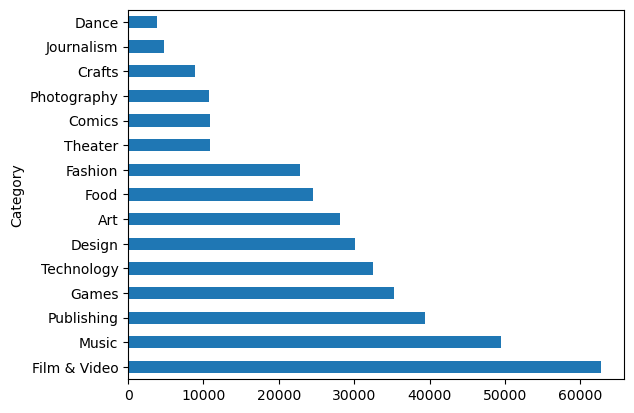

In [19]:
(df['Category'].value_counts().plot(kind='barh'))

/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


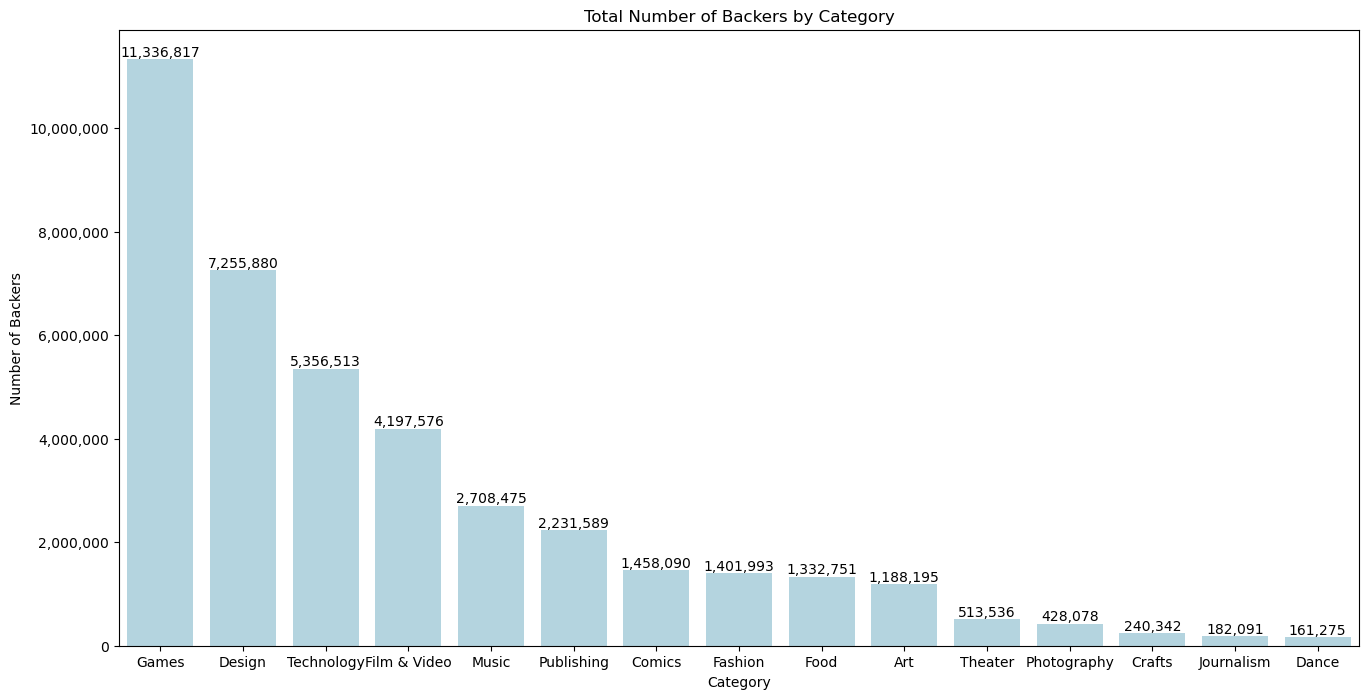

In [43]:
backers_by_category = df.groupby('Category')['Backers'].sum().reset_index()
fig = plt.figure(figsize=(16, 8))
backers_by_category = backers_by_category.sort_values(by='Backers', ascending=False).reset_index()

# Create a bar plot using Seaborn
sns.barplot(x='Category', y='Backers', data=backers_by_category, color='lightblue')

# Set the title and axis labels
plt.title('Total Number of Backers by Category')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Format y-axis ticks to show the actual number of backers
def format_ticks(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

# Add total number of backers on top of each bar
for index, row in backers_by_category.iterrows():
    plt.annotate(f'{int(row["Backers"]):,}', xy=(index, row['Backers']), ha='center', va='bottom')

# Show the plot
plt.show()
plt.show()

/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

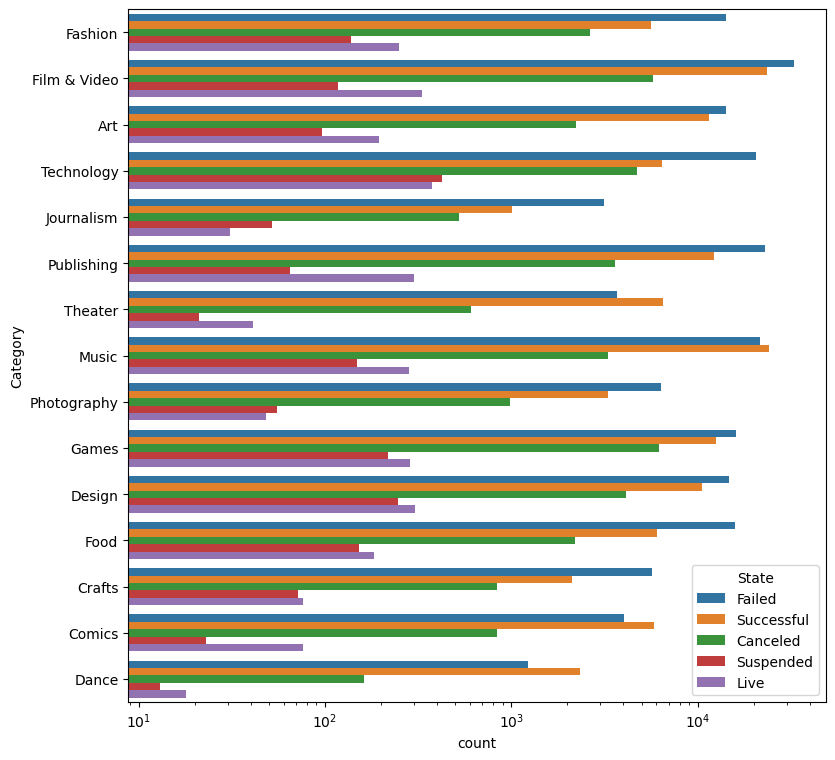

In [49]:
plt.figure(figsize=(9, 9))
sns.countplot(df, y='Category', hue='State')
plt.xscale('log')

/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

<Axes: xlabel='count', ylabel='Category'>

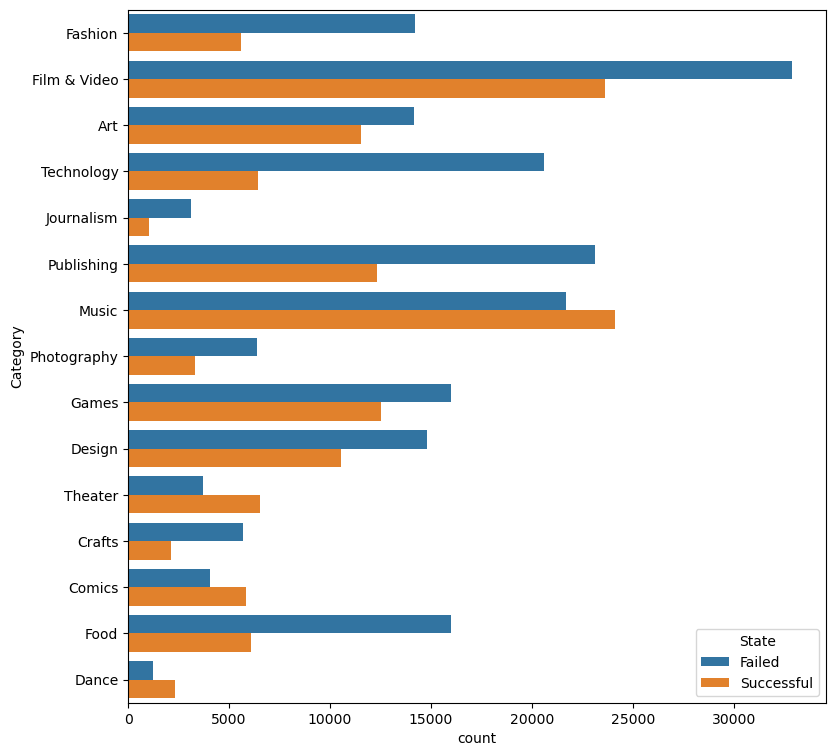

In [50]:
fail_or_success = df.query("State == 'Successful' or State == 'Failed'")
plt.figure(figsize=(9, 9))
sns.countplot(fail_or_success, y='Category', hue='State')

### Put at the end / or in model notebook

In [3]:
def prepare_data(dataframe):
    dataframe_new = dataframe.copy()
    # extract duration
    dataframe_new["Launched"] = pd.to_datetime(dataframe_new["Launched"])
    dataframe_new["Deadline"] = pd.to_datetime(dataframe_new["Deadline"])
    dataframe_new["Duration_days"] = (dataframe_new["Deadline"] - dataframe_new["Launched"]).dt.days
    # extract month / year
    dataframe_new["Month"] = dataframe_new["Launched"].dt.month
    # drop 'State' == 'Other' (Canceled, Suspended and Live)
    dataframe_new = dataframe_new.query("State == 'Successful' or State == 'Failed'")
    # drop specific categories (?)
    # dataframe_new = dataframe_new.query("Category != '...' and Category != '...'")
    # Combine 'Category' and 'Subcategory' (to not loose correlation)
    dataframe_new["Combined_category"] = df["Category"] + " - " + df["Subcategory"]
    categories = ["Category", "Subcategory", "Country", "State", "Combined_category"]
    dataframe_new[["Category", "Subcategory", "Country", "State", "Combined_category"]] = \
        dataframe_new[["Category", "Subcategory", "Country", "State", "Combined_category"]].astype("category")
    # 0 < Goal < 10_000_000
    dataframe_new = dataframe_new.query("0 < Goal < 100_000")
    # Pledged > 0
    dataframe_new = dataframe_new.query("Pledged > 0")
    # implement Name: len
    # dataframe_new["Name_length"] = dataframe_new["Name"].str.len()
    dataframe_new['Name_word_count'] = dataframe_new['Name'].str.split().apply(len)
    # concentrate on specific region (?)
    # dataframe_new = dataframe_new.query("Country != 'United States'")

    # Years: 2012 - 2018
    dataframe_new = dataframe_new[dataframe_new["Launched"].dt.year >= 2012]
    
    dataframe_new = dataframe_new.drop(["ID", "Launched", "Deadline", "Category", "Subcategory"], axis=1)
    
    return dataframe_new

### RESEACH QUESTIONS:

1. Is the success of a campaign depending on the country?
2. Is the success of a campaign depending on the category?
3. Is the success of a campaign depending on the month of launching?
4. Is the success of a campaign depending on the duration of the campaign?
5. Is the success of a campaign depending on the Name?

<br>

### HYPOTHESIS:

1. If started in US, then more money is raised.
2. If category is technology, then the campaign is more likely to succeed.
3. If the campaign is launched in September, the success rate is higher.
4. If you set your duration lower than 30 days (default) than your success rate improves.
5. The catchier and shorter the name, the higher the success rate.


---

1. Success vs. Country

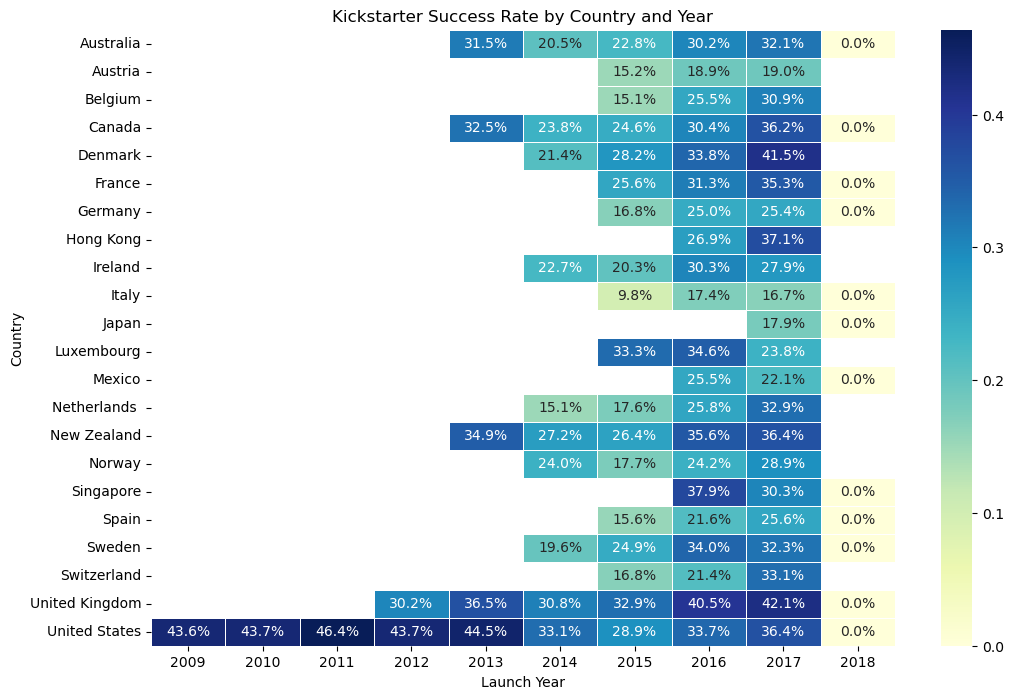

In [52]:
# SUCCESS RATE per country and year

df['Launched'] = pd.to_datetime(df['Launched'], format='%Y-%m-%d %H:%M:%S')
df['Deadline'] = pd.to_datetime(df['Deadline'], format='%Y-%m-%d')

# calculate the time difference between 'deadline' and 'launched' in days
df['Duration'] = (df['Deadline'] - df['Launched']).dt.days

# Convert date columns to datetime
df['Launched'] = pd.to_datetime(df['Launched'])
df['Deadline'] = pd.to_datetime(df['Deadline'])

# Extract the year from Launched
df['Launch_Year'] = df['Launched'].dt.year

# Calculate success rate
# Define successful projects
df['Is_Successful'] = df['State'] == 'Successful'

# Group by Country and Launch_Year and calculate success rate
success_rate_by_country_year = df.groupby(['Country', 'Launch_Year'])['Is_Successful'].mean().reset_index()

# Create a pivot table
pivot_table = success_rate_by_country_year.pivot_table(index='Country', columns='Launch_Year', values='Is_Successful', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1%", linewidths=.5)
plt.title('Kickstarter Success Rate by Country and Year')
plt.xlabel('Launch Year')
plt.ylabel('Country')
plt.show()

2. Success vs. Category

<Figure size 1200x800 with 0 Axes>

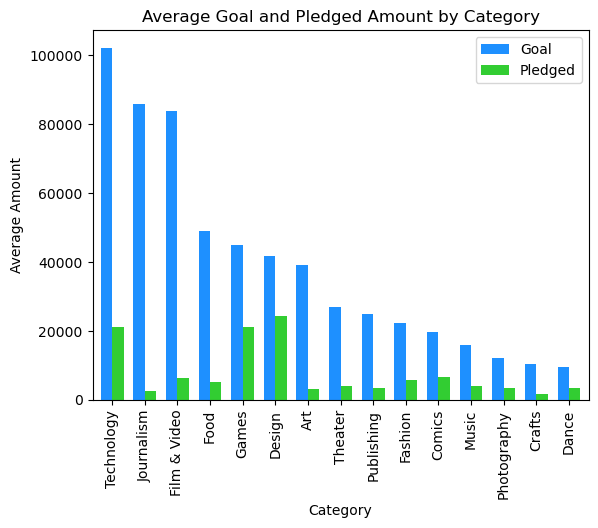

In [53]:
# AVERAGE GOAL VS. PLEDGED PER CATEGORY

# Group by Category and calculate the mean of the 'Goal' and 'Pledged' columns
goal_pledged_by_category = df.groupby('Category')[['Goal', 'Pledged']].mean()

# Sort the values to display in a more meaningful order
goal_pledged_by_category = goal_pledged_by_category.sort_values(by='Goal', ascending=False)

# Plot the goal and pledged amounts by category
plt.figure(figsize=(12, 8))
ax = goal_pledged_by_category.plot(kind='bar', color=['dodgerblue', 'limegreen'], width=0.7, position=0.5)

plt.title('Average Goal and Pledged Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=90)
plt.legend(['Goal', 'Pledged'])
plt.show()

<Figure size 1000x500 with 0 Axes>

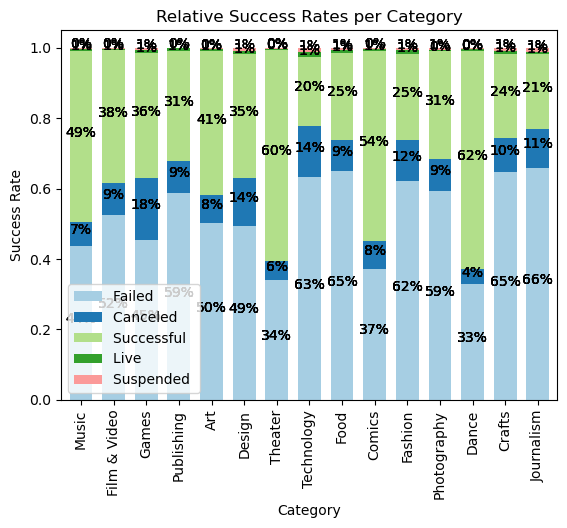

In [54]:
# RELATIVE SUCCESS RATE PER CATEGORY

states = ['Failed', 'Canceled', 'Successful', 'Live', 'Suspended']

# Create a pivot table to calculate the relative success rate per category
pivot_table = df.pivot_table(index='Category', columns='State', aggfunc='size', fill_value=0)

# Calculate the total counts per category
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calculate the relative success rate (Successful / Total) for each state
for state in states:
    pivot_table[f'{state} '] = pivot_table[state] / pivot_table['Total']

# Sort the categories by the success rate of 'Successful' state
sorted_categories = pivot_table['Successful'].sort_values(ascending=False).index
pivot_table = pivot_table.reindex(sorted_categories)

# Plot the relative success rates per category for all states
plt.figure(figsize=(10, 5))
colors = plt.cm.Paired(range(len(pivot_table)))
# Show the legend with a white background
ax = pivot_table[[f'{state} ' for state in states]].plot(kind='bar', stacked=True, color=colors, width=0.7)
plt.title('Relative Success Rates per Category')
plt.xlabel('Category')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)

# Annotate the bars with percentage values
for state in states:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        success_rate = p.get_height()
        ax.annotate(f'{success_rate*100:.0f}%', (x + width / 2, y + height / 2), ha='center')

# Enable legend with white background
ax.legend()
ax.get_legend().set_frame_on(True)

plt.show()

3. Succes vs. Month of Launch

4. Success vs. Duration

5. Success vs. Name

In [55]:
ks['Name_word_count'].nunique()

NameError: name 'ks' is not defined

In [ ]:
ks['Name_word_count'].unique()

array([ 1,  7,  2,  6,  9,  5,  8, 11,  4,  3, 10, 12, 13, 14, 15, 17, 19,
       16, 27, 21, 18, 29])

In [56]:
custom_palette = {"Failed": "orange", "Successful": "lightgreen"}

plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Name_word_count', data=ks, palette=custom_palette)

# Add labels and title
plt.xlabel('Campaign State')
plt.ylabel('Name Length (Number of Words)')
plt.title('Correlation between Name Length and Campaign Success')

# Show the plot
plt.show()


NameError: name 'ks' is not defined

<Figure size 1000x600 with 0 Axes>

In [57]:
plt.figure(figsize=(12, 6))

# Define a custom hue order to match the legend labels
hue_order = ['Successful', 'Failed']

# Use the 'hue_order' parameter to specify the order of the hue (State) levels
sns.countplot(x='Name_word_count', hue='State', data=ks, palette='Set2', hue_order=hue_order)

plt.xlabel('Name Length')
plt.ylabel('Count')
plt.title('Number of Successful and Failed Campaigns by Name Length')

plt.legend(title='State', labels=['Successful', 'Failed'])
plt.show()

NameError: name 'ks' is not defined

<Figure size 1200x600 with 0 Axes>

---

1. If started in US ...

2. If category is technology, then ...

3. If campaign is launched in September, then ...

4. If duration of campaign is shorter than 30 days, then ...

5. If the campaign name is shorter, then ...